In [46]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:

def print_history(history, i, eval_model):  
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    # Graficación de la pérdida durante el entrenamiento y la validación
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(loss, label=f'Training Loss - Configuration {i}')
    plt.plot(val_loss, label=f'Validation Loss - Configuration {i}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(f'Training and Validation Loss -\nBetter Loss {eval_model[0]}')
    plt.legend()

    # Graficación de la precisión durante el entrenamiento y la validación
    plt.subplot(1, 2, 2)
    plt.plot(accuracy, label=f'Training Accuracy - Configuration {i}')
    plt.plot(val_accuracy, label=f'Validation Accuracy - Configuration {i}')
    plt.axhline(y=eval_model[1], color='r', linestyle='--', label=f'Test Accuracy - Configuration {i}')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title(f'Training and Validation Accuracy\nBest Accuracy {eval_model[1]}')
    plt.legend()

    plt.subplots_adjust(wspace=0.5)  # Ajusta el espacio entre los subplots horizontalmente
    plt.tight_layout()
    plt.show()
def convertir_mes_a_numero(fecha):
    if len(fecha) == 5 and fecha[1] == '-' and fecha[2:].isdigit():
        return fecha  
    
    meses = {
        'Jan': '1', 'Feb': '2', 'Mar': '3', 'Apr': '4',
        'May': '5', 'Jun': '6', 'Jul': '7', 'Aug': '8',
        'Sep': '9', 'Oct': '10', 'Nov': '11', 'Dec': '12'
    }
    if len(fecha) == 6 and fecha[2] == '-' and fecha[:2].isdigit():
        numero_mes = meses.get(fecha[3:])
        if numero_mes:
            return f"{int(fecha[:2])}-{numero_mes.zfill(2)}"
    
    partes = fecha.split('-')
    numero_mes = meses.get(partes[0])
    if numero_mes:
        return f"{numero_mes}-{partes[1]}"
    else:
        return fecha 

In [3]:
data_test = pd.read_csv("submission-ds.csv")
data_test
data_test['Edad'] = data_test['Edad'].apply(convertir_mes_a_numero)
data_test['Duración de la Clase'] = data_test['Duración de la Clase'].apply(convertir_mes_a_numero)

In [4]:
datam1 = pd.read_csv("Data_m1.csv")
datam2 = pd.read_csv("Data_train_categoric_as_num.csv")
datam3 = pd.read_csv("Data_train_normalize.csv")

In [5]:
display(datam1)
display(datam2)
display(datam3)

,Nivel de Adaptación,Tipo de Red_2G,Tipo de Red_3G,Tipo de Red_4G,Estudiante de Tecnología_No,Estudiante de Tecnología_Si,Nivel de Educación_Colegio,Nivel de Educación_Escuela,Nivel de Educación_Universidad,Vive en Ciudad_No,...,Tipo de Internet_Compra Megas,Tipo de Internet_Wifi,Situación Financiera_Buena,Situación Financiera_Mala,Situación Financiera_Media,Género_Femenino,Género_Masculino,Duración de la Clase_0,Duración de la Clase_1-03,Duración de la Clase_3-06
0,0,0,1,0,0,1,0,0,1,0,...,0,1,0,0,1,0,1,0,0,1
1,1,0,1,0,1,0,0,1,0,0,...,1,0,0,0,1,1,0,0,1,0
2,0,0,1,0,0,1,0,0,1,0,...,1,0,0,1,0,0,1,0,1,0
3,1,0,1,0,0,1,0,1,0,0,...,1,0,0,0,1,0,1,0,1,0
4,2,0,0,1,0,1,0,0,1,0,...,0,1,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
959,1,0,1,0,1,0,0,0,1,0,...,1,0,0,0,1,0,1,0,1,0
960,1,0,1,0,1,0,0,1,0,0,...,1,0,0,0,1,1,0,0,1,0
961,0,0,0,1,1,0,0,0,1,0,...,1,0,0,0,1,0,1,1,0,0
962,1,0,1,0,1,0,0,0,1,0,...,1,0,0,0,1,0,1,0,1,0


,Tipo de Red,Estudiante de Tecnología,Nivel de Educación,Vive en Ciudad,Tipo de Instituto,Edad,Dispositivo,Tipo de Internet,Situación Financiera,Género,Duración de la Clase,Nivel de Adaptación
0,1,1,2,1,0,3,0,1,2,1,2,1
1,1,0,1,1,0,1,1,0,2,0,1,2
2,1,1,2,1,0,3,1,0,1,1,1,1
3,1,1,1,1,0,1,1,0,2,1,1,2
4,2,1,2,1,0,3,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
959,1,0,2,1,0,3,1,0,2,1,1,2
960,1,0,1,1,0,1,1,0,2,0,1,2
961,2,0,2,1,1,3,1,0,2,1,0,1
962,1,0,2,1,0,3,1,0,2,1,1,2


,Tipo de Red,Estudiante de Tecnología,Nivel de Educación,Vive en Ciudad,Tipo de Instituto,Edad,Dispositivo,Tipo de Internet,Situación Financiera,Género,Duración de la Clase,Nivel de Adaptación
0,-1.240771,1.722521,1.103632,0.524531,-0.675421,0.735289,-2.228075,1.155050,0.558508,0.901127,1.767815,1
1,-1.240771,-0.580544,-0.278058,0.524531,-0.675421,-0.920829,0.310772,-0.865763,0.558508,-1.109721,-0.080530,2
2,-1.240771,1.722521,1.103632,0.524531,-0.675421,0.735289,0.310772,-0.865763,-1.103225,0.901127,-0.080530,1
3,-1.240771,1.722521,-0.278058,0.524531,-0.675421,-0.920829,0.310772,-0.865763,0.558508,0.901127,-0.080530,2
4,0.710458,1.722521,1.103632,0.524531,-0.675421,0.735289,-2.228075,1.155050,-2.764958,0.901127,-0.080530,0
...,...,...,...,...,...,...,...,...,...,...,...,...
959,-1.240771,-0.580544,1.103632,0.524531,-0.675421,0.735289,0.310772,-0.865763,0.558508,0.901127,-0.080530,2
960,-1.240771,-0.580544,-0.278058,0.524531,-0.675421,-0.920829,0.310772,-0.865763,0.558508,-1.109721,-0.080530,2
961,0.710458,-0.580544,1.103632,0.524531,1.480558,0.735289,0.310772,-0.865763,0.558508,0.901127,-1.928874,1
962,-1.240771,-0.580544,1.103632,0.524531,-0.675421,0.735289,0.310772,-0.865763,0.558508,0.901127,-0.080530,2


In [6]:
x = datam1.drop('Nivel de Adaptación' , axis = 1)
y = datam1['Nivel de Adaptación']
x_train1 , x_test1 , y_train1 , y_test1 = train_test_split(pd.get_dummies(x) , y , test_size = 0.2 , random_state = 42)


In [7]:
X_encod = datam2.drop('Nivel de Adaptación' , axis = 1)
y_encod = datam2['Nivel de Adaptación']
x_train_encod , x_test_encod , y_train_encod , y_test_encod = train_test_split(X_encod , y_encod , test_size = 0.2 , random_state = 42)

In [8]:
X_norm = datam3.drop('Nivel de Adaptación' , axis = 1)
y_norm = datam3['Nivel de Adaptación']
x_train_norm , x_test_norm , y_train_norm , y_test_norm = train_test_split(X_norm , y_norm , test_size = 0.2, random_state = 32 )

In [9]:
def run_model(ep, bat_size,max_neur,x_train  , y_train, activation_function1='relu', activation_function2='relu', activation_function_out='softmax'):
    model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape = x_train.shape[1:]),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(int(max_neur/2) , activation = 'relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(max_neur , activation = activation_function1),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.2) ,
        tf.keras.layers.Dense(11 , activation = activation_function2),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(3 , activation = activation_function_out)
    ])

    model.compile(
        loss='sparse_categorical_crossentropy',
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        metrics=['accuracy']
    )

    callback = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=15,
        restore_best_weights=True
    )

    history = model.fit(
        x_train,
        y_train,
        epochs=ep,
        validation_split=0.2,
        batch_size=bat_size,
        callbacks=[callback]
    )
    return history, model

Experimento con diferentes parametros 

In [10]:
def evaluate_models(X_train, y_train,X_test, y_test ):
    ep=50
    i=0
    bat_size=128
    max_nue=33
    list_history = []
    list_model = []
    evaluation_results = [] 
    better_conf= []
    while i<9:
        if(i<3):    
            history,model=run_model(ep,bat_size,max_nue,X_train,y_train)
        if(i>2 and i<6):
            history,model=run_model(ep,bat_size,max_nue,X_train,y_train, 'gelu', 'relu')
        if(i>5 ):
            history,model=run_model(ep,bat_size,max_nue,X_train,y_train, 'leaky_relu', 'elu')
        list_history.append(history)
        list_model.append(model)
        better_conf.append((ep,bat_size,max_nue))
        ep=ep+ep
        i+=1
        max_nue+=33
        loss_encod , acc_encod =model.evaluate(X_test, y_test)
        evaluation_results.append((loss_encod,acc_encod))
    return list_history,evaluation_results,better_conf,list_model

Data tipo 1

In [11]:
list_history,evaluation_results,better_conf,list_model=evaluate_models(x_train1, y_train1,x_test1,y_test1)


Epoch 1/50
5/5 [==============================] - 2s 83ms/step - loss: 1.4648 - accuracy: 0.3393 - val_loss: 1.1548 - val_accuracy: 0.4194
Epoch 2/50
5/5 [==============================] - 0s 16ms/step - loss: 1.3304 - accuracy: 0.3685 - val_loss: 1.1308 - val_accuracy: 0.4581
Epoch 3/50
5/5 [==============================] - 0s 15ms/step - loss: 1.2521 - accuracy: 0.4075 - val_loss: 1.1073 - val_accuracy: 0.4968
Epoch 4/50
5/5 [==============================] - 0s 15ms/step - loss: 1.1700 - accuracy: 0.4448 - val_loss: 1.0859 - val_accuracy: 0.4839
Epoch 5/50
5/5 [==============================] - 0s 18ms/step - loss: 1.1071 - accuracy: 0.4448 - val_loss: 1.0683 - val_accuracy: 0.4903
Epoch 6/50
5/5 [==============================] - 0s 17ms/step - loss: 1.0838 - accuracy: 0.4594 - val_loss: 1.0517 - val_accuracy: 0.4903
Epoch 7/50
5/5 [==============================] - 0s 13ms/step - loss: 1.0292 - accuracy: 0.5032 - val_loss: 1.0357 - val_accuracy: 0.4968
Epoch 8/50
5/5 [===========

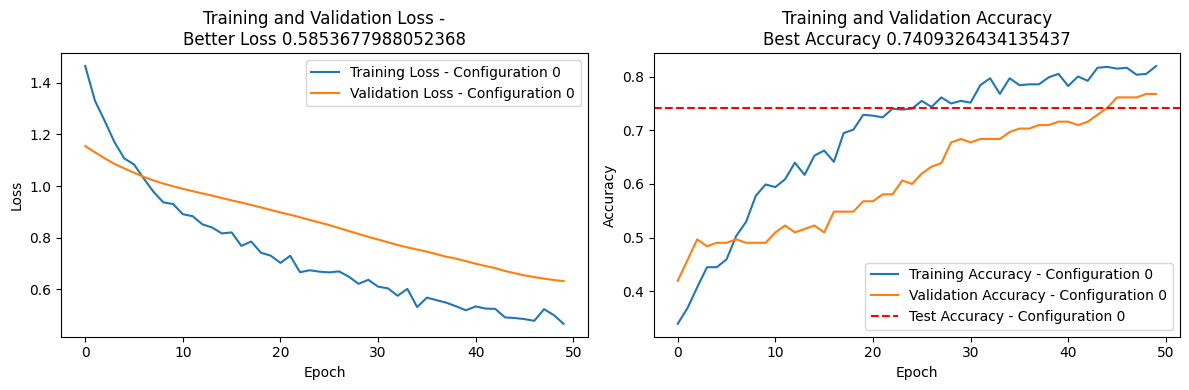

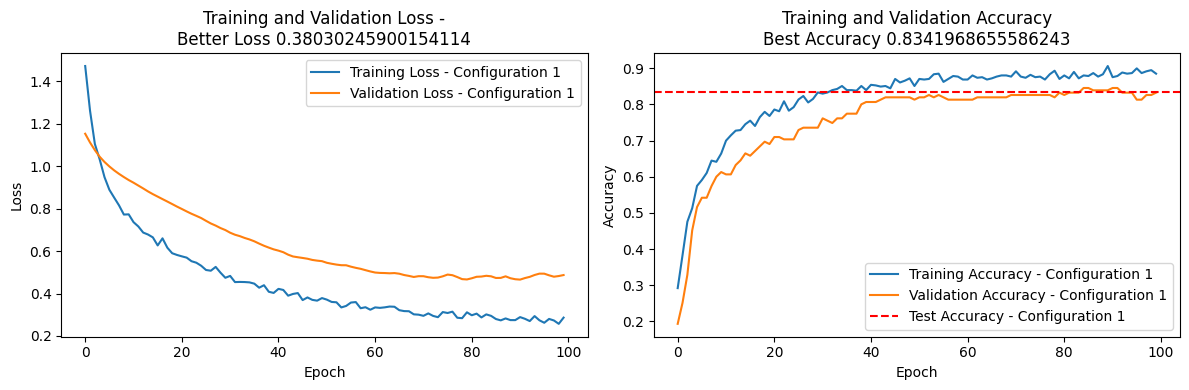

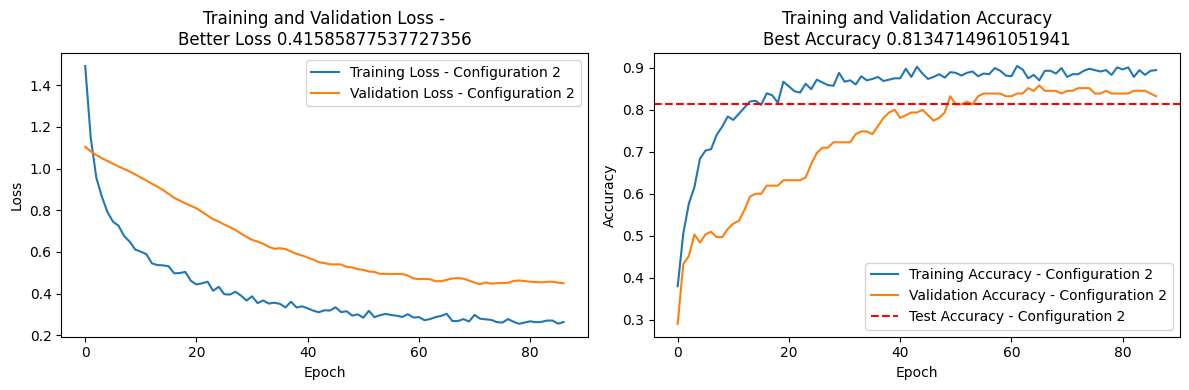

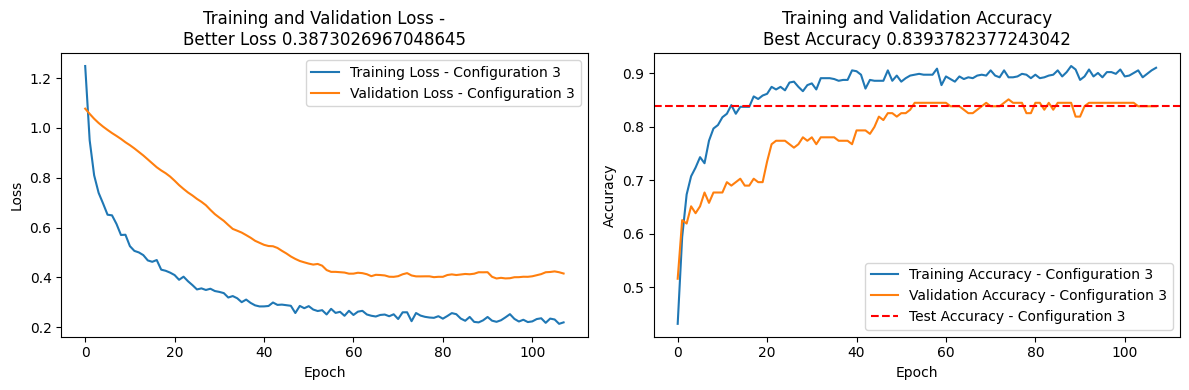

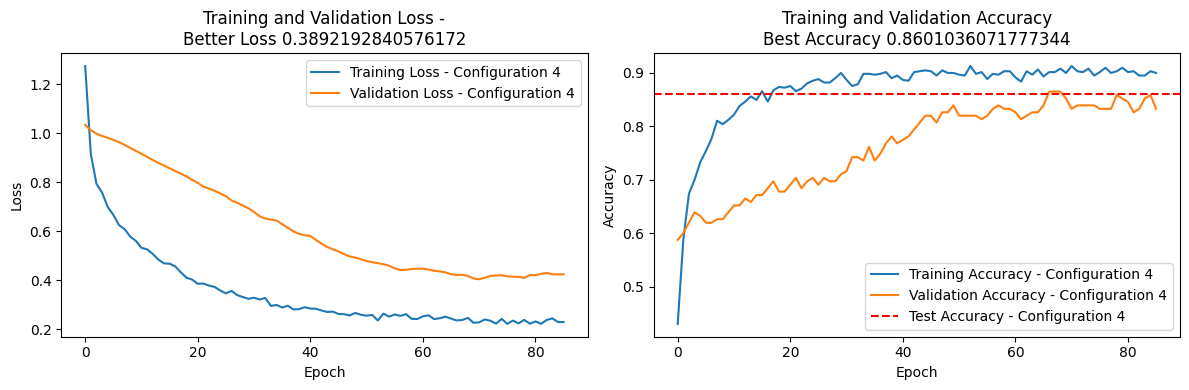

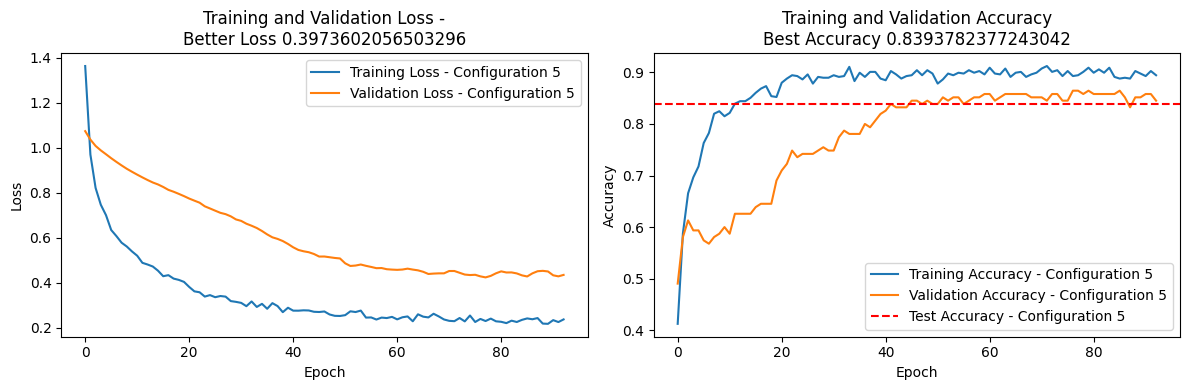

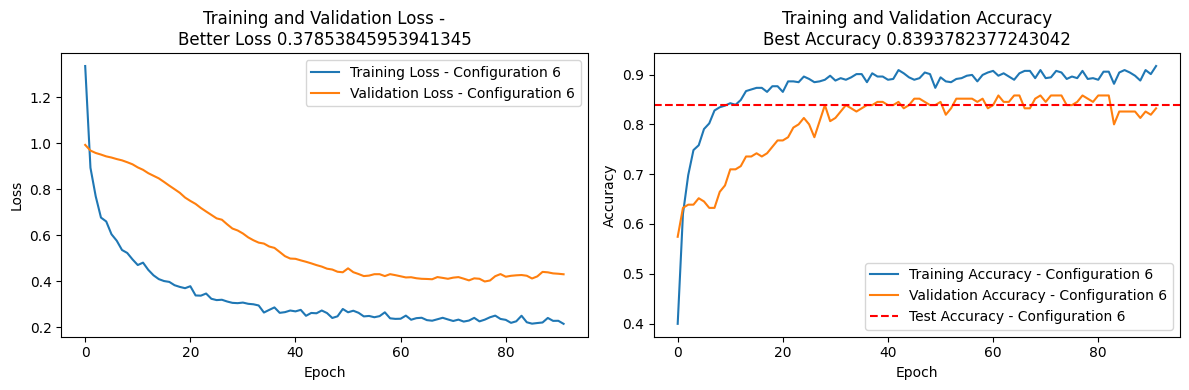

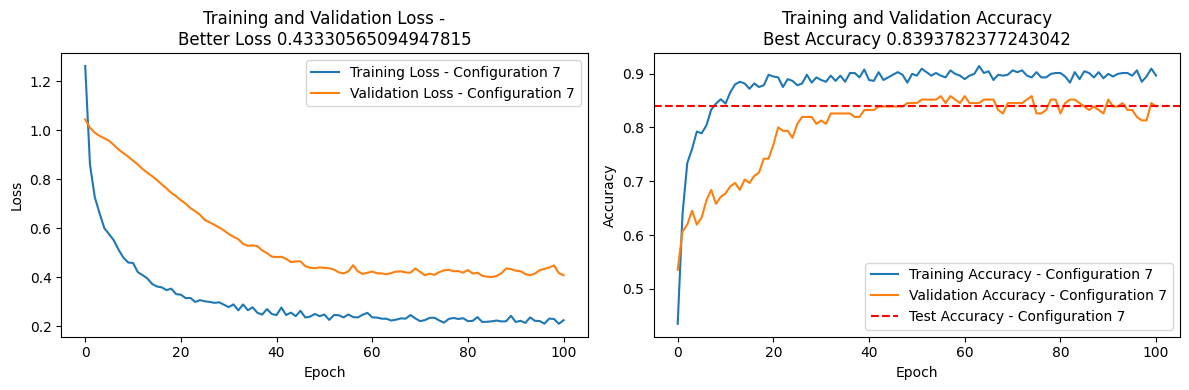

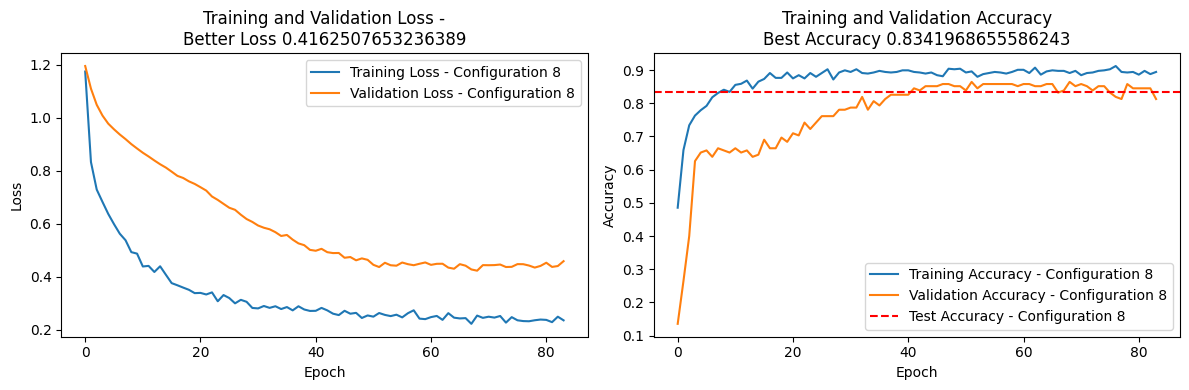

In [12]:
i=0
for hist in list_history:
    
    print_history(hist,i,evaluation_results[i])
    i+=1

In [13]:
list_model[8].evaluate(x_train1,y_train1)

25/25 [==============================] - 0s 3ms/step - loss: 0.2617 - accuracy: 0.8975


[0.2617150545120239, 0.8975356817245483]

In [14]:
#data_test1 =pd.get_dummies(data_test)
#pedict_m1= list_model[8].predict(data_test1)
#predict_model1 = pedict_m1.argmax(axis=1)
#print(predict_model1)

In [15]:
##resultados_prediccion1 = pd.DataFrame({
 #   'id': range(1, len(predict_model1) + 1),
  #  'Nivel de Adaptación': predict_model1
#})
#resultados_prediccion1['Nivel de Adaptación'] = resultados_prediccion1['Nivel de Adaptación'].map({0: 'Bajo', 1: 'Moderado', 2: 'Alto'})

#print(resultados_prediccion1)
#resultados_prediccion1.to_csv('resultados_prediccion_m1_3.csv', index=False)

data tipo 2

In [16]:
list_history,evaluation_results,better_conf,list_model=evaluate_models(x_train_encod, y_train_encod,x_test_encod,y_test_encod)


Epoch 1/50


5/5 [==============================] - 2s 84ms/step - loss: 1.6223 - accuracy: 0.3377 - val_loss: 1.1401 - val_accuracy: 0.4000
Epoch 2/50
5/5 [==============================] - 0s 14ms/step - loss: 1.4667 - accuracy: 0.3653 - val_loss: 1.1138 - val_accuracy: 0.4194
Epoch 3/50
5/5 [==============================] - 0s 16ms/step - loss: 1.3525 - accuracy: 0.4075 - val_loss: 1.0900 - val_accuracy: 0.4129
Epoch 4/50
5/5 [==============================] - 0s 16ms/step - loss: 1.2407 - accuracy: 0.4351 - val_loss: 1.0687 - val_accuracy: 0.4194
Epoch 5/50
5/5 [==============================] - 0s 16ms/step - loss: 1.1773 - accuracy: 0.4221 - val_loss: 1.0496 - val_accuracy: 0.5097
Epoch 6/50
5/5 [==============================] - 0s 16ms/step - loss: 1.1023 - accuracy: 0.5016 - val_loss: 1.0329 - val_accuracy: 0.5226
Epoch 7/50
5/5 [==============================] - 0s 17ms/step - loss: 1.0328 - accuracy: 0.5195 - val_loss: 1.0166 - val_accuracy: 0.5161
Epoch 8/50
5/5 [======================

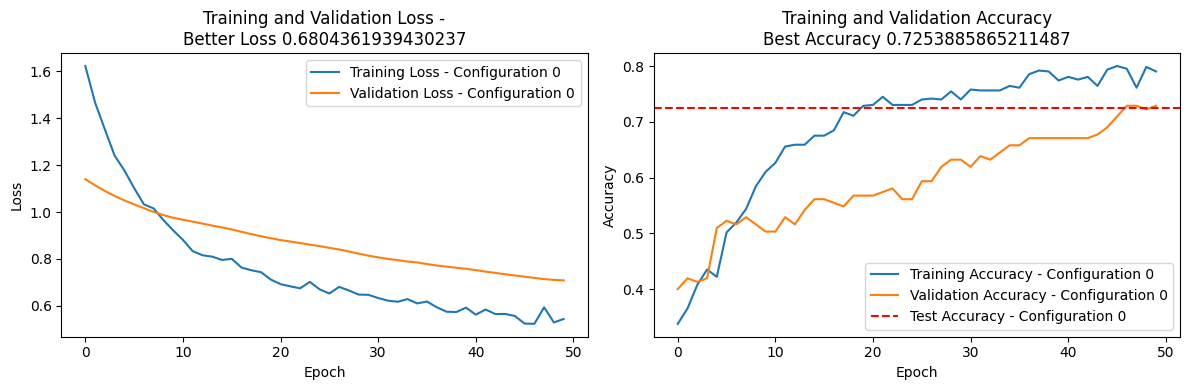

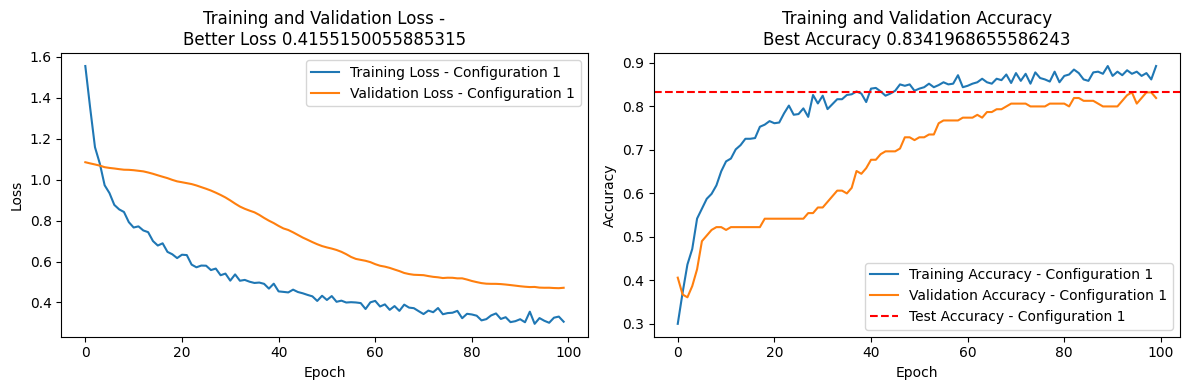

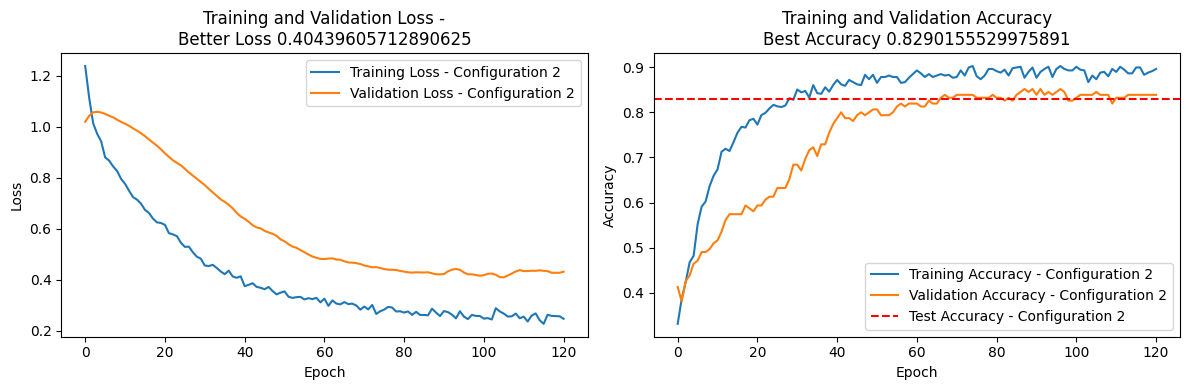

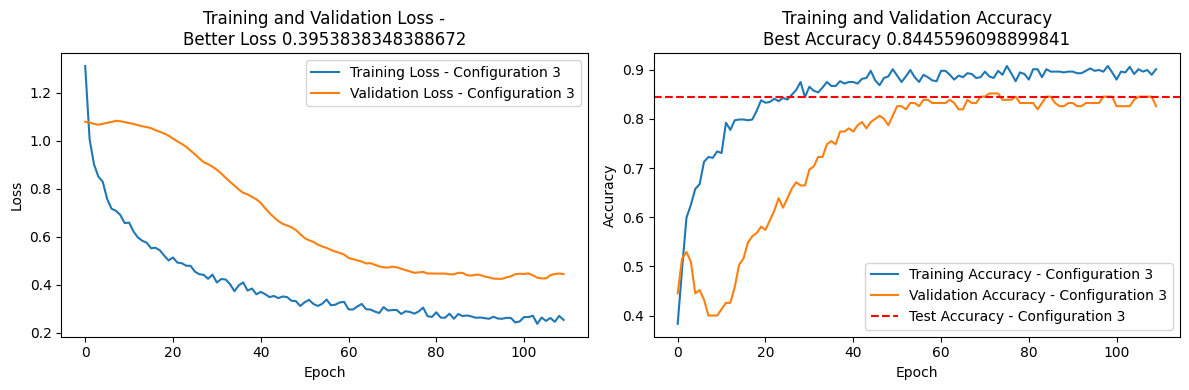

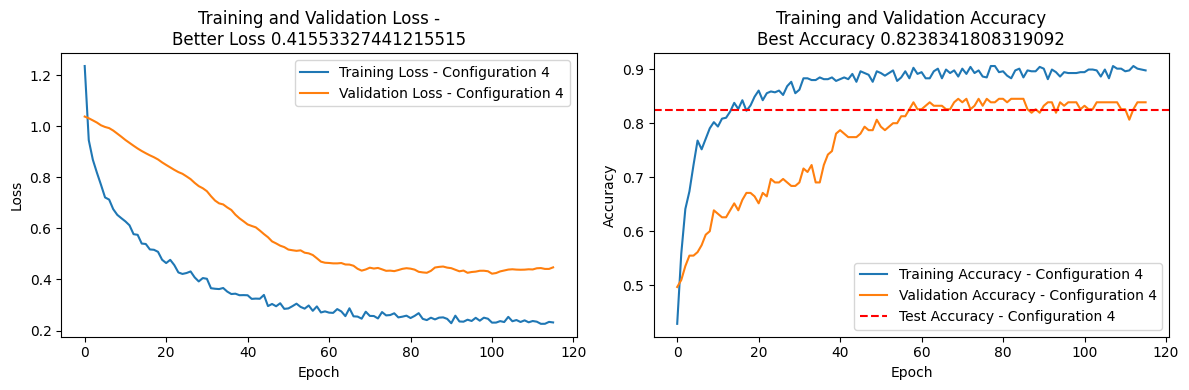

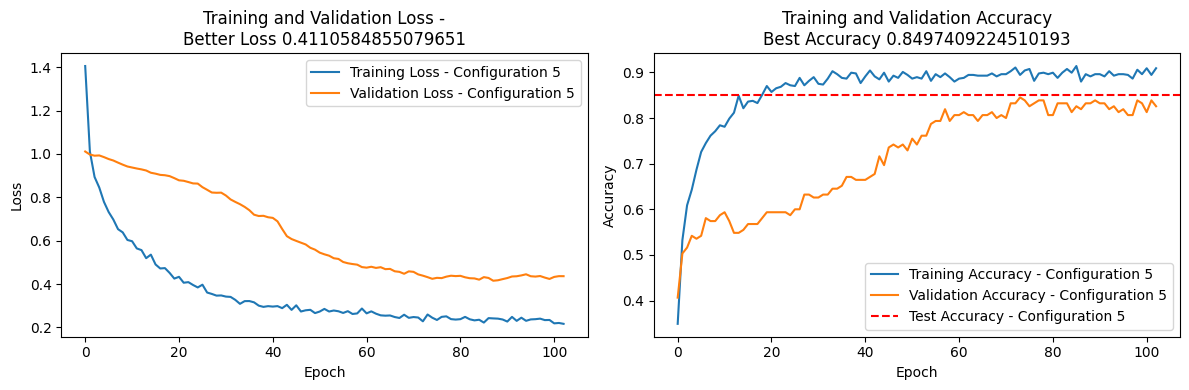

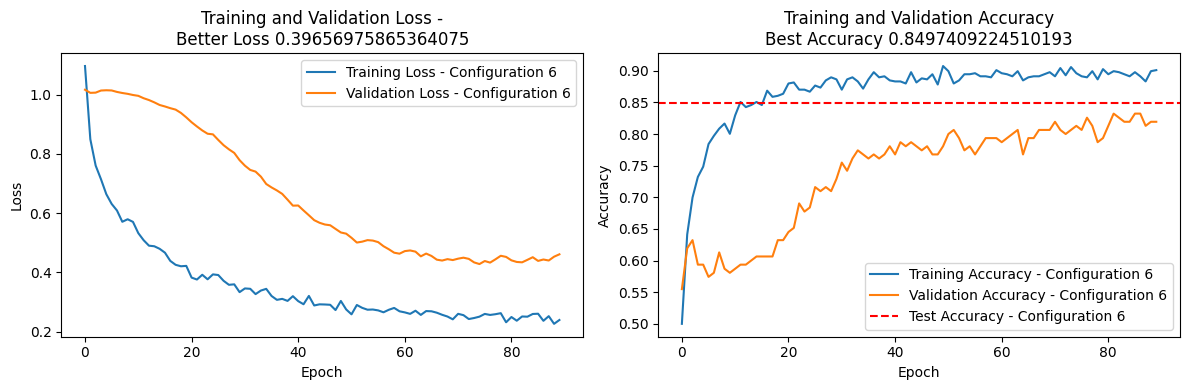

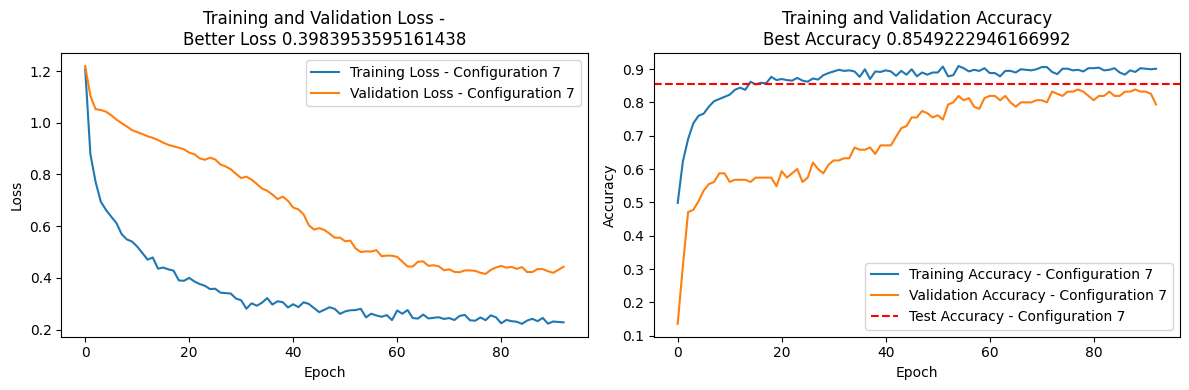

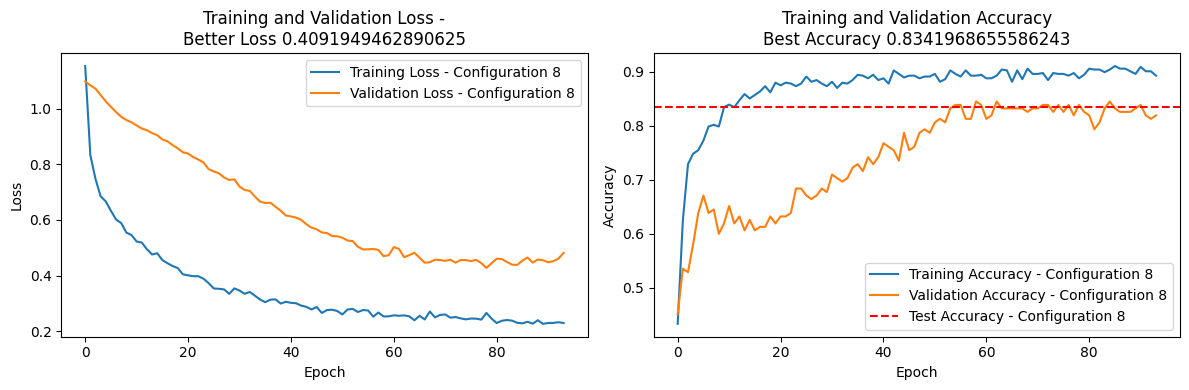

In [17]:
i=0
for hist in list_history:
    
    print_history(hist,i,evaluation_results[i])
    i+=1

DAta tipo 3

In [18]:
list_historyn,evaluation_resultsn,better_conf,list_model=evaluate_models(x_train_norm, y_train_norm,x_test_norm,y_test_norm)


Epoch 1/50
5/5 [==============================] - 2s 67ms/step - loss: 1.2751 - accuracy: 0.4205 - val_loss: 1.1021 - val_accuracy: 0.4387
Epoch 2/50
5/5 [==============================] - 0s 16ms/step - loss: 1.1844 - accuracy: 0.4383 - val_loss: 1.0800 - val_accuracy: 0.4903
Epoch 3/50
5/5 [==============================] - 0s 15ms/step - loss: 1.1290 - accuracy: 0.4562 - val_loss: 1.0606 - val_accuracy: 0.5097
Epoch 4/50
5/5 [==============================] - 0s 16ms/step - loss: 1.0588 - accuracy: 0.5065 - val_loss: 1.0406 - val_accuracy: 0.5290
Epoch 5/50
5/5 [==============================] - 0s 15ms/step - loss: 1.0314 - accuracy: 0.5260 - val_loss: 1.0221 - val_accuracy: 0.5935
Epoch 6/50
5/5 [==============================] - 0s 15ms/step - loss: 0.9725 - accuracy: 0.5714 - val_loss: 1.0049 - val_accuracy: 0.6323
Epoch 7/50
5/5 [==============================] - 0s 15ms/step - loss: 0.9473 - accuracy: 0.5925 - val_loss: 0.9894 - val_accuracy: 0.6387
Epoch 8/50
5/5 [===========

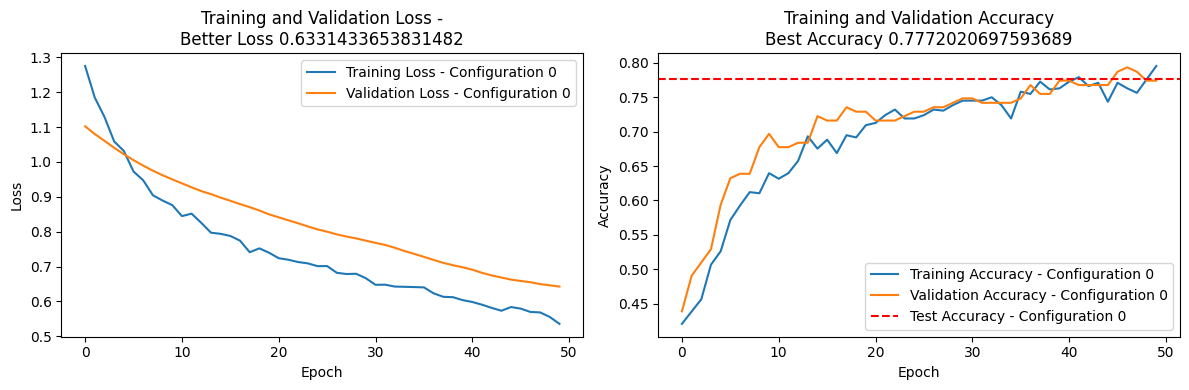

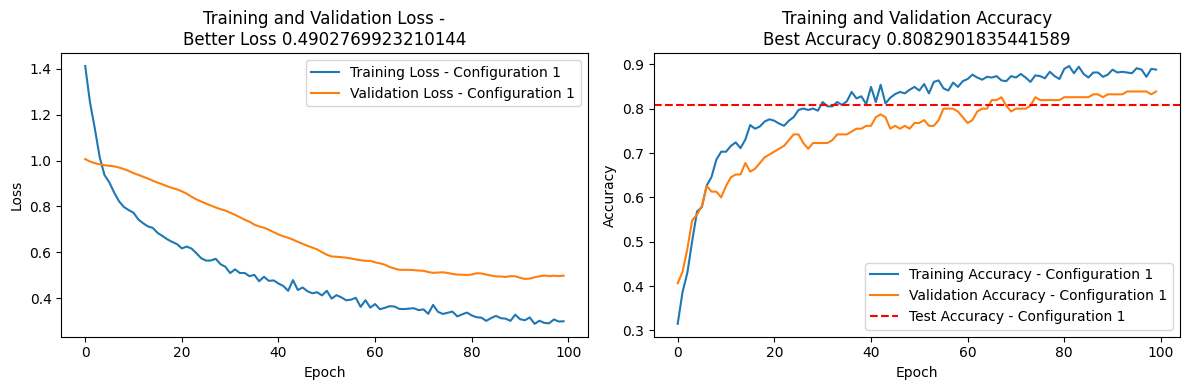

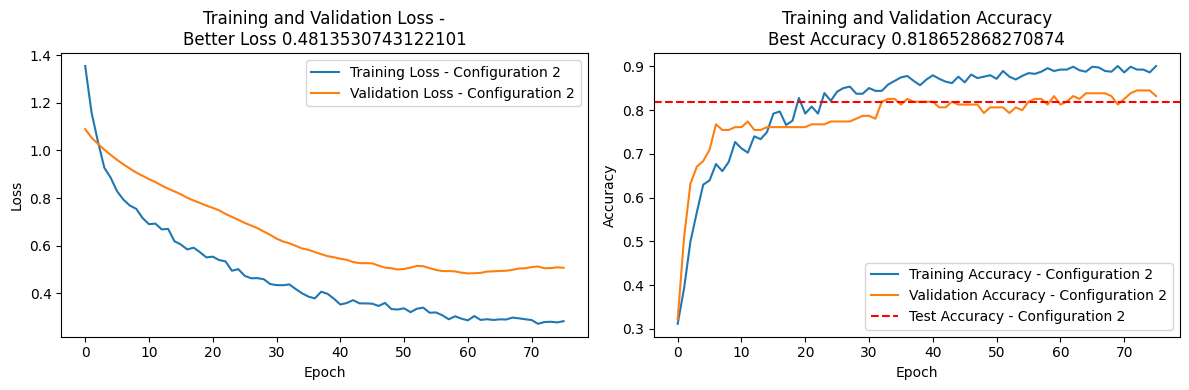

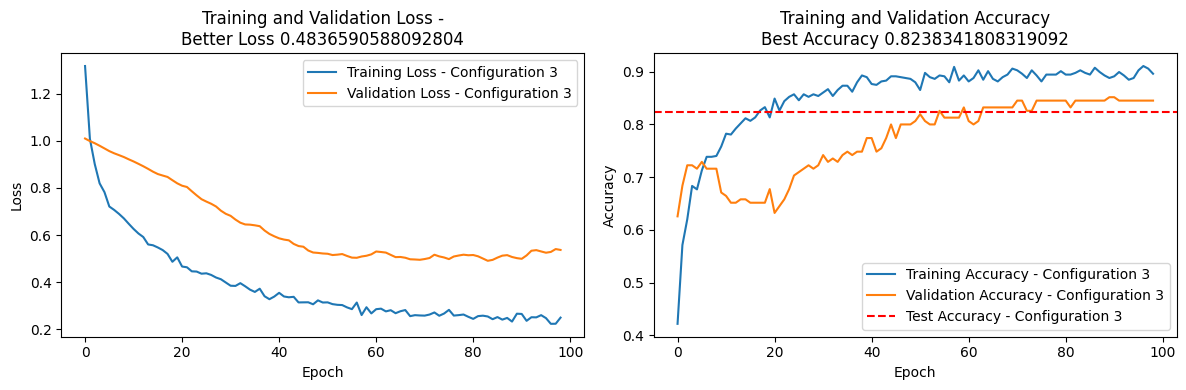

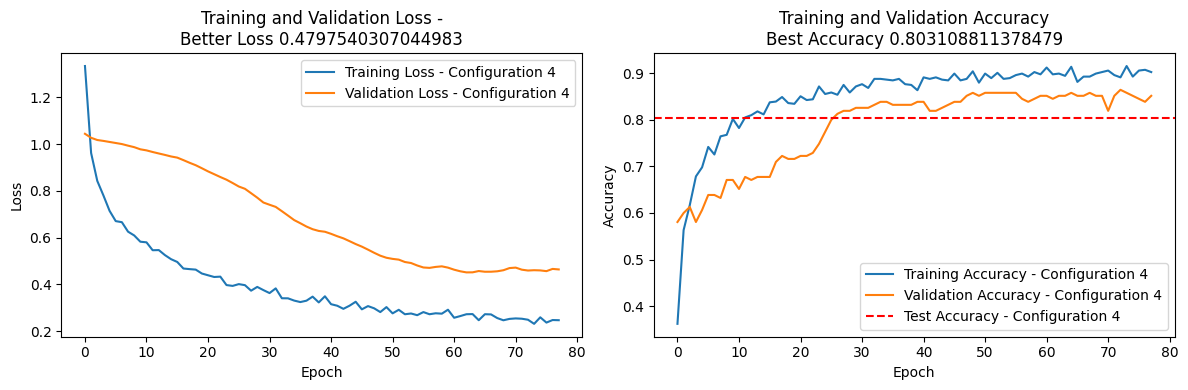

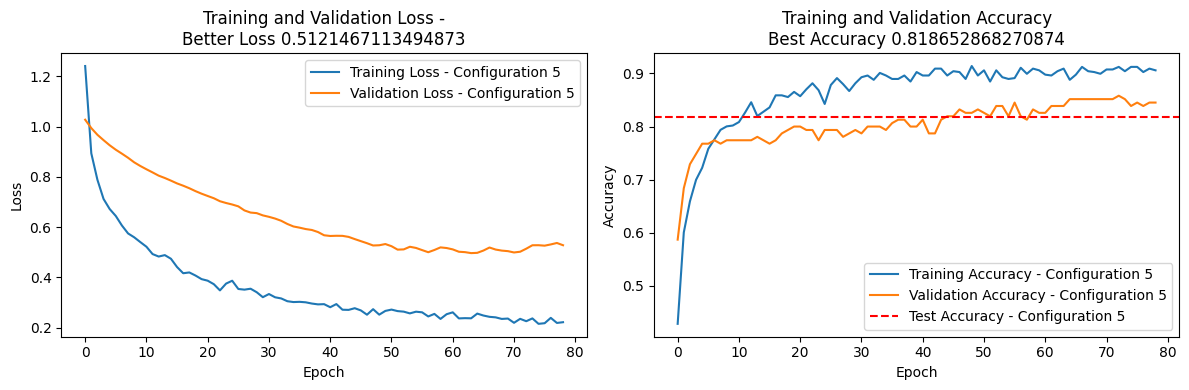

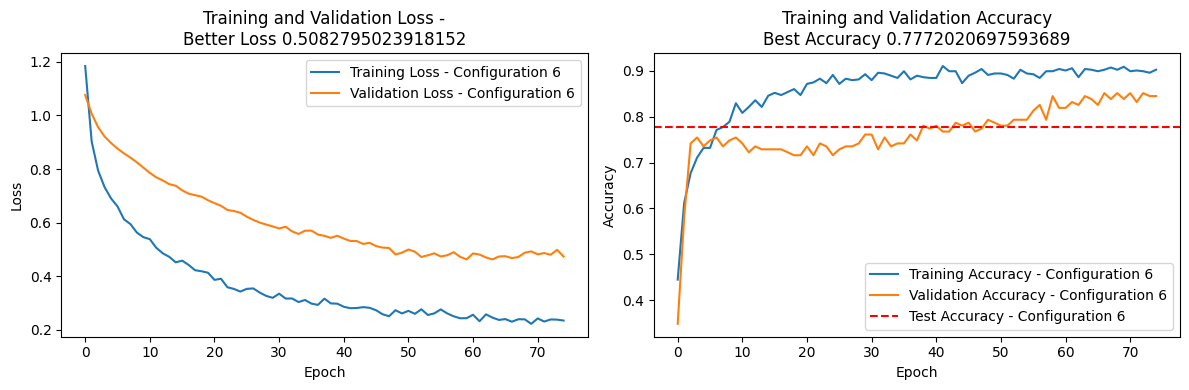

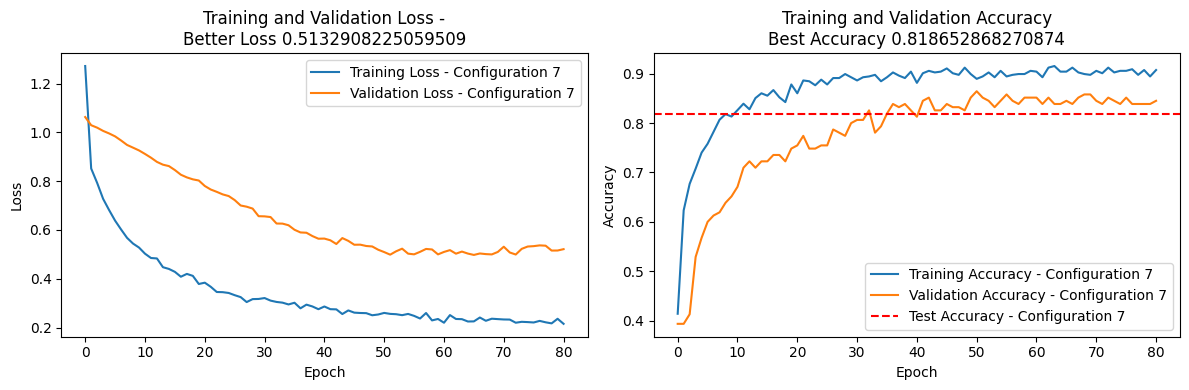

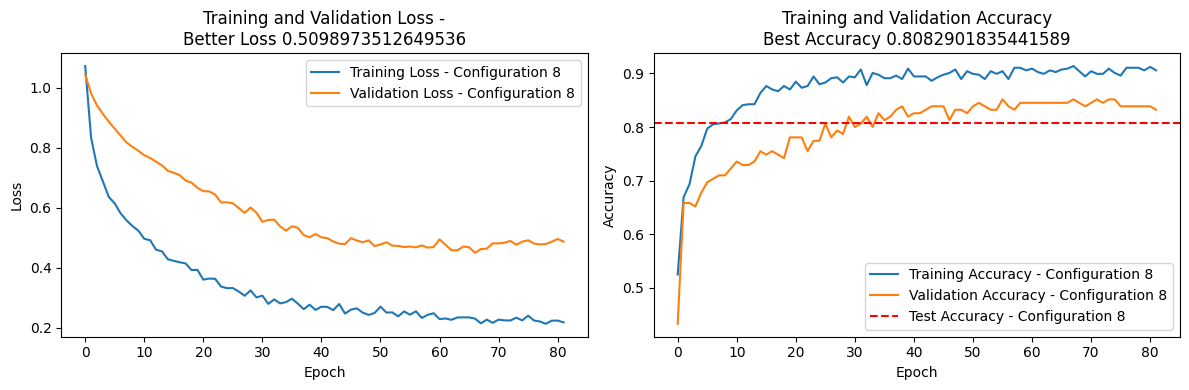

In [19]:
i=0
for hist in list_historyn:
    
    print_history(hist,i,evaluation_resultsn[i])
    i+=1

### Conclusion
Considerando que no se tiene un data set grande, esto implica que si realizamos un numero pequeño de epocs nos puede dar un sobre ajuste, las funciones de activacion son importantes a la hr de entrenar nuestro modelo ya que estas estan diseñadas para conjuntos de datos especificos por eso se recomiendo analizar el tipo de problema a resolver. Si bien es sabido que para ver que hiiper parametros nos conviene utilizar, existen algunos metodos ya elaborados en nuestro caso no pudimos ponerlos a prueba por eso se decidio hacer una ejecucion enviandole diferentes configuraciones de hiperparametros y funciones de activacion no es lo optimo pero es lo que nos resulto para experimentar podemos ver como el modelo propuesto corta los epocs cuando detecta un punto muerto o punto de overfitting 